In [1]:
from biomarker.models import Ensemble
from biomarker.data_collection import *

import numpy as np

%matplotlib notebook

In [2]:
EXCLUDE_KEYS = [206, 205, 184, 183, 82, 81, 45]
TEST_KEYS = [217, 216]

In [3]:
ensemble = Ensemble(meta_model='tree')

In [4]:
excel = parse_master_file(exclude_keys=EXCLUDE_KEYS)
# alter the weighting of low logK values:
# excel = duplicate_master(excel, 3, 20, how='lt')
L = get_filename_list(excel['Associated data'])

In [5]:
x1 = create_x1_matrix(L)
x4 = create_x4_matrix(L)
x5 = create_x5_matrix(L)
x6 = create_x6_matrix(L)
x7 = create_x7_matrix(L)

y = excel['Output: logK'].values

In [6]:
x10_x17 = excel.iloc[:, 3:-2]
master, master_names = prepare_master(x10_x17)

In [7]:
x1_train = x1[:-2]
x4_train = x4[:-2]
x5_train = x5[:-2]
x6_train = x6[:-2]
x7_train = x7[:-2]
master_train = master[:-2]

y_train = y[:-2]

In [8]:
ensemble.fit(x1_train,x4_train,x5_train,x6_train,x7_train,master_train,y_train)

In [9]:
prediction = ensemble.predict(x1[-2:], x4[-2:], x5[-2:], x6[-2:], x7[-2:], master[-2:])

In [10]:
prediction

array([6.39556   , 4.31207547])

In [11]:
prediction - y[-2:]

array([-0.14444   ,  2.32207547])

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

<IPython.core.display.Javascript object>


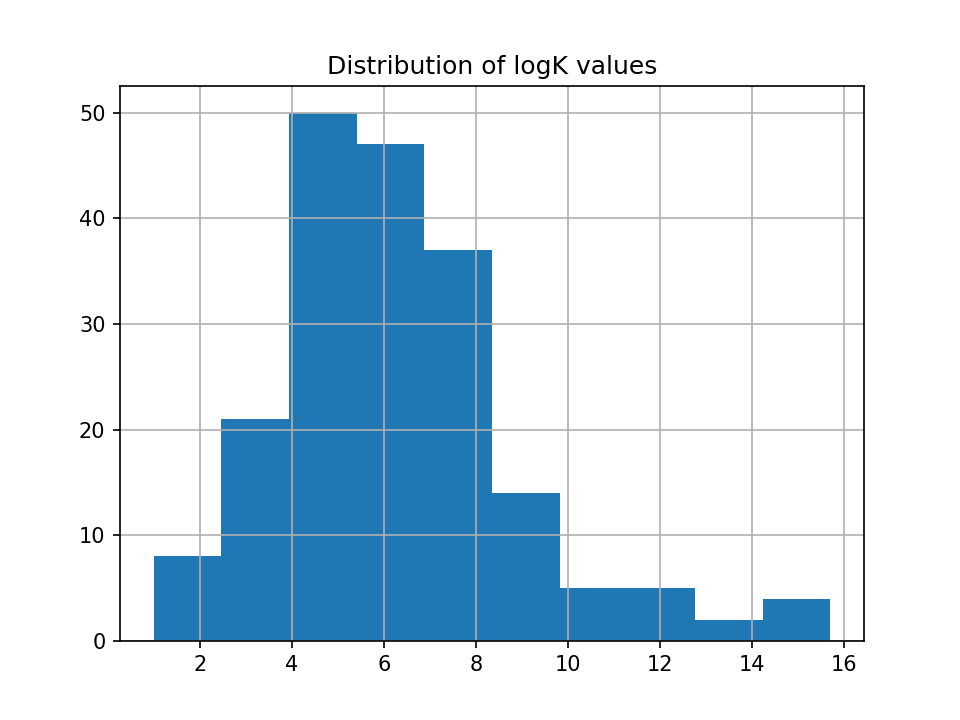

Text(0.5,1,'Distribution of logK values')

In [15]:
excel['Output: logK'].hist().set_title('Distribution of logK values')